<a href="https://colab.research.google.com/github/Nicolaser1102/Introduccion_al_aprendizaje_profundo/blob/main/Ejercicio_sobre_RNC/Ejercicio_sobre_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING DOJO 
## Fecha creación:19/3/2022
## Fecha de actualización: 19/3/2022
## Esteban Simbaña

# Ejercicio sobre RNC

Montamos el drive

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import pandas as pd
import numpy as np

#Importación de Base de datos de prueba y entrenamiento

## df_train

In [114]:
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Códigos/Track 3/Deberes /Week 3 - Track 3/Ejercicio sobre RNC/fashion-mnist_train.csv'
df = pd.read_csv(nombrearchivo)
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Limpieza de datos


In [115]:
#miramos cuantas filas y columnas contiene el df
df.shape

(60000, 785)

In [116]:
#tratamos de mirar si existen datos faltantes 
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Al no poder observar si existen datos faltantes por la gran cantidad de columnas, realizamos un filtro para obtener las columnas con datos faltantes (si es que las hay)

In [117]:
#filtro datos faltantes 

df_filtro = df.isnull().sum() > 0
df_filtro

label       False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel780    False
pixel781    False
pixel782    False
pixel783    False
pixel784    False
Length: 785, dtype: bool

In [118]:
#lista que contendrá la suma de datos faltantes

suma_df = 0

#creamos un bucle for para contar los datos faltantes
for i in range (len(df_filtro)):
  if df_filtro[i] == True:
    suma_df = suma_df+1


In [119]:
suma_df

0

El df no contiene datos faltantes, por lo que podemos trabajar libremente con el df

Finalmente le asignamos a la df como df_train

In [120]:
df_train = df

## df_test

In [121]:
# Importamos la df de prueba
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Códigos/Track 3/Deberes /Week 3 - Track 3/Ejercicio sobre RNC/fashion-mnist_test.csv'
df_prueba = pd.read_csv(nombrearchivo)
df_prueba.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df_prueba.shape

(10000, 785)

### Limpieza de datos

In [123]:
#filtro datos faltantes 

df_prueba_filtro = df_prueba.isnull().sum() > 0
df_prueba_filtro

label       False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel780    False
pixel781    False
pixel782    False
pixel783    False
pixel784    False
Length: 785, dtype: bool

In [124]:
#buscamos datos faltantes
#lista que contendrá la suma de datos faltantes

suma_df_test = 0

#creamos un bucle for para contar los datos faltantes
for i in range (len(df_prueba_filtro)):
  if df_prueba_filtro[i] == True:
    suma_df_test = suma_df_test+1


In [125]:
suma_df_test

0

La df de prueba no contiene datos faltantes

Df_prueba con la que vamos a trabajar

In [126]:
df_prueba.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Implementación del modelo

In [145]:
#Importamos librerías que necesitamos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## División de conjuntos de prueba y entrenamiento

Definimos los conjuntos de prueba y entrenamiento

X_train

In [128]:
X_train = df_train.drop(columns ='label')
X_train.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
X_train.shape

(60000, 784)

X_test

In [130]:
X_test = df_prueba.drop(columns = 'label')
X_test.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0


In [131]:
X_test.shape

(10000, 784)

y_train

In [132]:
y_train = df_train['label']
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [133]:
y_train.shape

(60000,)

y_test

In [134]:
y_test = df_prueba['label']
y_test

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [135]:
y_test.shape

(10000,)

## Escalado de datos

Como nos muestra en la plataforma, para hacer un escalado de los datos, simplemente podemos dividir todas los datos del conjunto de datos de las variables independiente (X) para 255, ya que ese es el número máximo que pueden llegar a tener los píxeles de una imagen.

In [136]:
X_train = X_train/255
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [137]:
X_test = X_test/255
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


## Reformamos los datos

Especialmente en este caso es importante cambiar de nuevo la estructura de datos, ya que la base de datos que tenemos es dimensional(filas y columnas)

In [138]:
# Reformar datos
# Reformar datos
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1)
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1)

## Cambiar formato del 'objetivo'
Es esencial que cambiemos los datos de la columna objetivo ('labels') a categóricas para que el algoritmo detecte que cada dato es parte de un objeto  diferente y no de un número mayor o menor.

In [139]:
df_train['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [140]:
df_prueba['label'].unique()

array([0, 1, 2, 3, 8, 6, 5, 4, 7, 9])

Cambiar a variables categóricas

In [165]:
#cambiamos a variables categóricas y el número de clases en 10 ya que es el número de clases que existen
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

Tenemos a nuestros conjuntos de datos listos para ser entrenados en la red neuronal

*Nota: Plantillas para la implementación de red neuronal utulizadas y obtenidas de Coding Dojo*

**Paso 1:** Definir la estructura de la red

In [142]:
# Guardar la forma de entrada
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [143]:
#Instanciamos el modelo que vamos a utilizar, en este caso el modelo 'Secuencial'
model = Sequential()

**Paso 1.2:** Añadir las capas ocultas que tendrá el modelo  

*Se utilizaron plantillas*

In [146]:
# Capa convolucional
model.add(Conv2D(filters = 10, # Cuantos filtros tendrá la primera capa
                 kernel_size = 3, # tamaño de cada filtro
                 input_shape = input_shape)) # características de entrada

# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Tamaño de pooling
model.add(Dropout(.2)) # aumentamos la funcion de dilucion para prevenir el sobreajuste

# Capa de aplanamiento
model.add(Flatten())


# Capa de salida
model.add(Dense(10, # Cuantas posibilidades de salida tenemos (clases o categorías)
                activation = 'softmax')) #Función de activación

**Paso:2** Compilar el modelo

In [147]:
#compilamos
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['acc'])

**Paso 3:** Entrenamos el modelo

In [149]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=50) #utilizamos 100 epocas

Epoch 1/50
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5626 - acc: 0.7950 - val_loss: 0.4625 - val_acc: 0.8385
Epoch 2/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4788 - acc: 0.8296 - val_loss: 0.4237 - val_acc: 0.8543
Epoch 3/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4468 - acc: 0.8400 - val_loss: 0.3997 - val_acc: 0.8590
Epoch 4/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4303 - acc: 0.8475 - val_loss: 0.3927 - val_acc: 0.8630
Epoch 5/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4137 - acc: 0.8533 - val_loss: 0.3707 - val_acc: 0.8726
Epoch 6/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4040 - acc: 0.8551 - val_loss: 0.3645 - val_acc: 0.8741
Epoch 7/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3986 - acc: 0.8578 - val_loss: 0.3565 - val_acc: 0.8738
Epoch 8/50
1875/1875 [==========================

**Paso 3.2:** Visualizamos la pérdida 

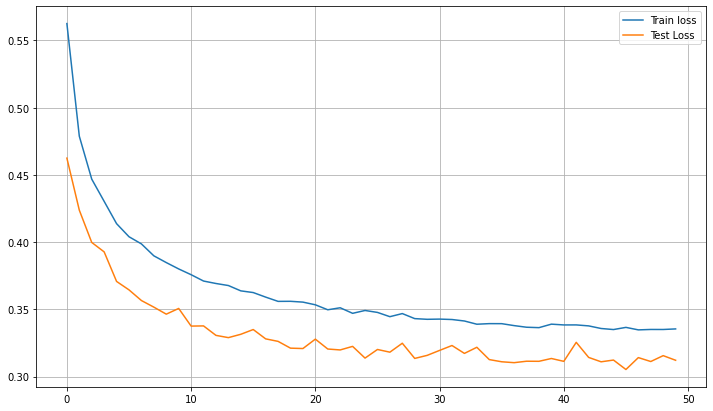

In [185]:
# Visualizar la pérdida
plt.figure(figsize=(12,7))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.grid()
plt.legend();

**Paso 3.3:** Visualizamos la precisión del modelo

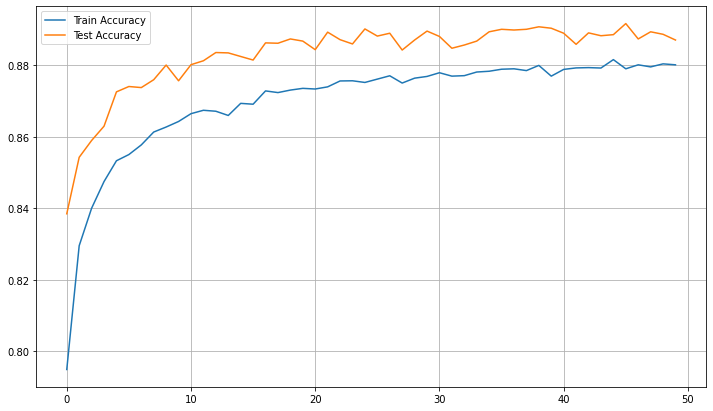

In [184]:
# Visualizar la precisión
plt.figure(figsize=(12,7))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.grid()
plt.legend();

Como podemos observar en la gráfica nuestro modelo alcanza una precisión de más del **88%**,  lo que hace que el modelo sea muy bueno al predecir las diferentes imágenes.